Epoch 1/10
2100/2100 [==============================] - 7s 3ms/step - loss: 1.4510 - accuracy: 0.5420 - val_loss: 0.4175 - val_accuracy: 0.8773
Epoch 2/10
2100/2100 [==============================] - 5s 3ms/step - loss: 0.3930 - accuracy: 0.8900 - val_loss: 0.3243 - val_accuracy: 0.9083
Epoch 3/10
2100/2100 [==============================] - 6s 3ms/step - loss: 0.3188 - accuracy: 0.9103 - val_loss: 0.2951 - val_accuracy: 0.9152
Epoch 4/10
2100/2100 [==============================] - 6s 3ms/step - loss: 0.2858 - accuracy: 0.9222 - val_loss: 0.2586 - val_accuracy: 0.9272
Epoch 5/10
2100/2100 [==============================] - 6s 3ms/step - loss: 0.2563 - accuracy: 0.9277 - val_loss: 0.2422 - val_accuracy: 0.9321
Epoch 6/10
2100/2100 [==============================] - 6s 3ms/step - loss: 0.2387 - accuracy: 0.9332 - val_loss: 0.2288 - val_accuracy: 0.9353
Epoch 7/10
2100/2100 [==============================] - 7s 3ms/step - loss: 0.2156 - accuracy: 0.9388 - val_loss: 0.2140 - val_accuracy:

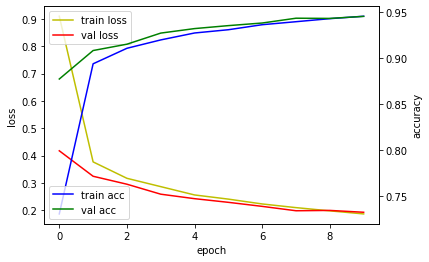

In [5]:
# 필요한 모듈 임포트 - tensorflow와 matplotlib.pyplot 모듈 불러오기
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

# MNIST 데이터셋 가져오기 - 데이터를 정규화하는 부분
# 텐서플로에서 MNIST데이터셋을 기본적으로 load_data()함수를 이용해 학습데이터 600,000개와 테스트데이터셋 10,000를 다운 후 넘파이 배열 형태로 가져옴
# 이때 x_train에 학습에 필요한 60,000장의 숫자 이미지(28*28) 데이터가 저장
# y_train에는 60,000장의 숫자 이미지의 라벨링된 실제 숫자값이 저장
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0 # 데이터 정규화   

# tf.data를 사용하여 데이터셋을 섞고 배치 만들기
# 학습용 데이터셋과 검증용 데이터셋을 7:3 비율로 나눠 데이터셋 객체를 생성
ds = tf.data.Dataset.from_tensor_slices((x_train, y_train)).shuffle(10000)
train_size = int(len(x_train) * 0.7) # 학습셋:검증셋 = 7:3
train_ds = ds.take(train_size).batch(20)
val_ds = ds.skip(train_size).batch(20)

# MNIST 분류 모델 구성
# 입력층 1개와 은닉층 2개, 출력층 1개로 구성된 간단한 심층 신경망
# 신경망의 입력층으로 Flatten()을 사용, Flatten 계층은 28x28 크기의 2차원 이미지를 1차원으로 평탄화 시킴
# 가로와 세로로 표현된 2차원 배열을 일렬로 나열해 1차원으로 만듬.(신경망의 뉴럴이 784개)
# 입력층에서 활성화 함수 없이 입력된 데이터 그대로 다음 은닉층으로 전달
# 2개의 은닉층은 Dense()를 사용해 출력 크기가 20, 활성함수로 ReLU를 사용하도록 함
# 활성함수로 Softmax를 사용하는 출력층을 만듬
# 숫자 이미지를 판별해야 하는 값은 0~9까지 총 10가지 이기때문에 출력층의 크기를 10으로 지정
# 입력층 Flatten을 제외한 나머지 층에서는 입력크기를 따로 지정하지 않음. 
# 케라스에서는 이전 층의 출력 갯수로 입력 크기를 자동 계산하기에 생략 가능 
# softmax 함수는 입력받은 값을 출력으로 0~1 사이의 값으로 정규화함.
# 이 함수는 출력값들의 총합이 항상 1이 되는 특징을 갖고 있어 결과를 확률로 표현할 수 잇다.
# 분류하고 싶은 클래스 갯수만큼 출력으로 구성하며 가장 큰 출력값을 가지는 클래스가 결과값으로 사용
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(20, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(10, activation='softmax'))


# 모델 생성
# 모델의 출력값과 실제 장답의 오차를 계산하는 손실 함수로는 sparse_categorical_crossentropy를 사용하며, 
# 오차를 보정하는 옵티마이저로는 SGD를 사용, 모델의 성능을 평가하는 데 사용하는 측정 항목은 accuracy를 사용함
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
# model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy])

# 모델 학습 - fit() 함수의 인자로는 학습에 필요한 데이터셋, 검증에 필요한 데이터셋, 에포크값(학습 횟수)을 사용
hist = model.fit(train_ds, validation_data=val_ds, epochs=10)

# 모델 평가 - evaluate() 함수를 이용해 성능을 평가
print('모델 평가')
model.evaluate(x_test, y_test)

# 모델 정보 출력 - 신경망 모델의 정보를 출력. 정의한 모델의 구성요소(계층종류, 출력형태)
model.summary()

#모델 저장 - h5 파일 포맷으로 저장
model.save('mnist_model.h5')

# 학습 결과 그래프 그리기 - 그래프에는 손실값loss과 학습 정확도 accuracy를 보여준다
# x축은 에포크(학습 횟수)를 의미, y축은 손실값과 정확도를 의미
# 학습 횟수가 증가할수록 학습과 검증 데이터의 정확도가 올라가고, 손실값은 감소
# 에포크값을 너무 크게 부여하면 오버피팅이 발생함.
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')

acc_ax.set_ylabel('accuracy')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')
plt.show()








Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 20)                15700     
_________________________________________________________________
dense_7 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_8 (Dense)              (None, 10)                210       
Total params: 16,330
Trainable params: 16,330
Non-trainable params: 0
_________________________________________________________________
313/313 - 0s - loss: 0.1921 - accuracy: 0.9446


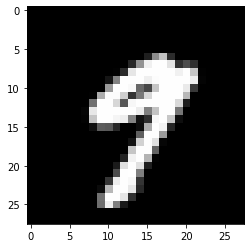

손글씨 이미지 예측값 :  [9]


In [6]:
# MNIST 분류 보델 사용하기
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

# MNIST 데이터셋 가져오기
_, (x_test, y_test) = mnist.load_data()
x_test = x_test / 255.0 # 데이터 정규화

# 모델 불러오기
model = load_model('mnist_model.h5')
model.summary()
model.evaluate(x_test, y_test, verbose=2)

# 테스트셋에서 20번째 이미지 출력
plt.imshow(x_test[20], cmap="gray")
plt.show()

# 테스트셋에서 20번째 이미지 클래스 분류
picks = [20]
predict = model.predict_classes(x_test[picks])
print("손글씨 이미지 예측값 : ", predict)